In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import sys

uint8
500 375


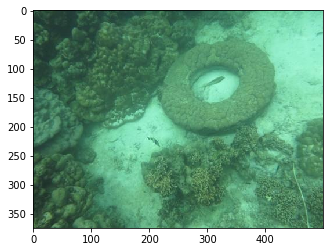

In [2]:
# reading image and its parameters
origImg = cv2.imread('../Raw/604_img_.png')
origImg = cv2.cvtColor(origImg, cv2.COLOR_BGR2RGB)

print(origImg.dtype)

height = origImg.shape[0]
width = origImg.shape[1]
print(width,height)
plt.imshow(origImg)

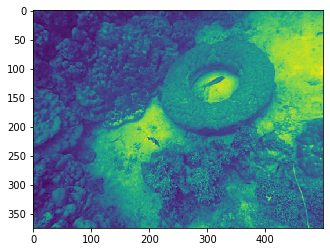

In [3]:
r,g,b = cv2.split(origImg)
plt.imshow(r)
plt.savefig('redOriginal.png',format = "png", dpi = 300)

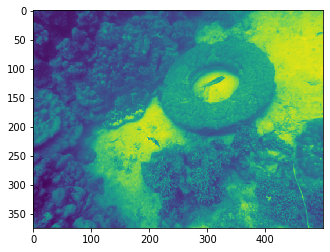

In [4]:
plt.imshow(g)

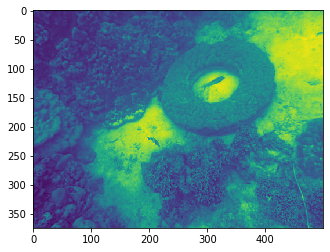

In [5]:
plt.imshow(b)

### White Balancing

In [6]:
#normalising r,g,b to range [0,1]

rW = np.divide(r,255)
gW = np.divide(g,255)
bW = np.divide(b,255)


print("\nmeanRed")
meanRed = np.sum(rW)/rW.size
print(meanRed)
print(np.sum(rW),rW.size)

print("\nmeanGreen")
meanGreen = np.sum(gW)/gW.size
print(meanGreen)
print(np.sum(gW),gW.size)

print("\nmeanBlue")
meanBlue = np.sum(bW)/bW.size
print(meanBlue)
print(np.sum(bW),bW.size)



meanRed
0.3208247633986928
60154.643137254905 187500

meanGreen
0.567357197385621
106379.47450980393 187500

meanBlue
0.42940881568627454
80514.15294117648 187500


In [7]:
# compensating red and blue channel

for i in range(height):
    for j in range(width):
        rW[i][j] += (meanGreen - meanRed)*(1-rW[i][j])*gW[i][j]

print(abs(meanBlue-meanGreen))
if(abs(meanBlue-meanGreen) > 0.1):
    for i in range(height):
        for j in range(width):
            bW[i][j] += (meanGreen - meanBlue)*(1-bW[i][j])*gW[i][j]

0.13794838169934642


In [8]:
# # de-normalising data
# rW = np.array(rW)*255
# gW = np.array(gW)*255
# bW = np.array(bW)*255

# # print(bW)

# rW = np.around(rW)
# rW = rW.astype(np.uint8)

# gW = np.around(gW)
# gW = gW.astype(np.uint8)

# bW = np.around(bW)
# bW = bW.astype(np.uint8)

In [9]:
AfterComp = cv2.merge((rW,gW,bW))

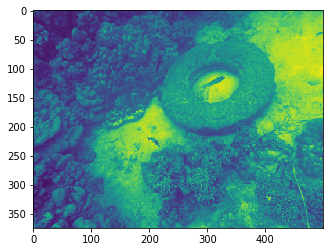

In [10]:
plt.imshow(rW)
plt.savefig('redCompensated.png',format = "png", dpi = 300)

# print(rW)

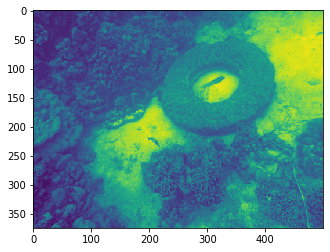

In [11]:
plt.imshow(bW)

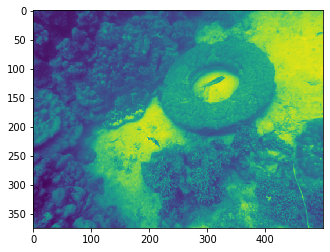

In [12]:
plt.imshow(gW)

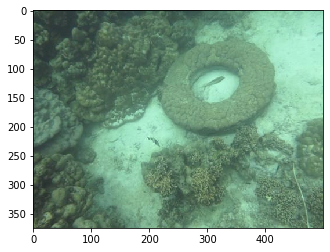

In [13]:
plt.imshow(AfterComp)

In [14]:
def GrayWorld(img,rF,gF,bF):

    # Applying gray world on image

    scale = np.sum(img)/np.size(img)
    print(scale)

    redM = np.sum(rF)/rF.size
    greenM = np.sum(gF)/gF.size
    blueM = np.sum(bF)/bF.size


    rF = np.array(rF)* scale / redM
    gF = np.array(gF)* scale / greenM
    bF = np.array(bF)* scale / blueM
    

#     rF = np.around(rF)
#     rF = rF.astype(np.uint16)
    
    print(rF.min())
    print(rF.max())
    print(rF)
#     print(rF)

#     gF = np.around(gF)
#     gF = gF.astype(np.uint16)

#     bF = np.around(bF)
#     bF = bF.astype(np.uint16)

    AfterGrayWorld = cv2.merge((rF,gF,bF))
    
    return AfterGrayWorld

0.4825417783412528
0.15804901414788688
0.8701573779100227
[[0.24972934 0.28098254 0.30586326 ... 0.64972862 0.6669261  0.67547134]
 [0.2549605  0.29648877 0.34671387 ... 0.6669261  0.68398092 0.69245482]
 [0.32124912 0.33146177 0.3263599  ... 0.67120318 0.68822233 0.70089306]
 ...
 [0.45110523 0.46081856 0.47860453 ... 0.38810531 0.35317244 0.32288223]
 [0.4462352  0.41189529 0.41517816 ... 0.42177648 0.3971588  0.36231955]
 [0.40116547 0.37124976 0.38454466 ... 0.37231821 0.36732334 0.33210959]]


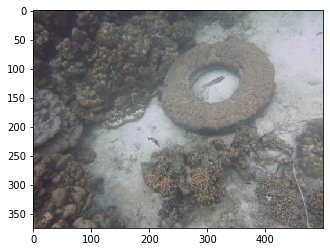

In [15]:
whiteBalanced = GrayWorld(AfterComp,rW,gW,bW)
# whiteBalanced = np.array(whiteBalanced)
plt.imshow(whiteBalanced)
plt.savefig('whiteBalance.png',format = "png", dpi = 300)

0.43919692549019607
0.1288434869699809
0.8965359301661172
[[0.20400219 0.23621306 0.26305545 ... 0.60126961 0.62274352 0.63348048]
 [0.20937067 0.2523185  0.30600328 ... 0.62274352 0.64421743 0.65495439]
 [0.27916089 0.28989785 0.28452937 ... 0.628112   0.64958591 0.66569135]
 ...
 [0.41337285 0.42410981 0.44558373 ... 0.33821415 0.3006348  0.26842393]
 [0.40800438 0.37042503 0.3757935  ... 0.3757935  0.34895111 0.31137176]
 [0.35968807 0.3274772  0.34358263 ... 0.32210872 0.31674024 0.27916089]]


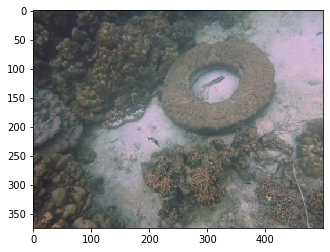

In [16]:
r = np.divide(r,255)
g = np.divide(g,255)
b = np.divide(b,255)

origImg = cv2.merge((r,g,b))
DirectGrayWorld = GrayWorld(origImg,r,g,b)
plt.imshow(DirectGrayWorld)
plt.savefig('DirectGrayWorld.png',format = "png", dpi = 300)

### Gamma correction and unsharp masking 

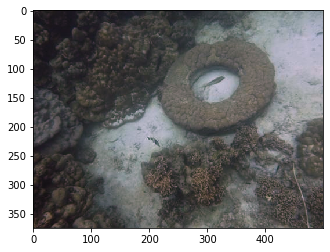

In [17]:
# gamma correction
gamma = 1.5
gammaCorrected = np.copy(whiteBalanced)
for i in range(height):
    for j in range(width):
        gammaCorrected[i][j] = (whiteBalanced[i][j])**gamma  #/255.0)**gamma * 255
# gammaCorrected = gammaCorrected.astype(np.uint8)
plt.imshow(gammaCorrected)
plt.savefig('gammaCorrected.png',format = "png", dpi = 300)

In [18]:
# traditional unsharped masking
def tradUnsharpMask(whiteBalanced):
    blur = cv2.GaussianBlur(whiteBalanced,(5,5),0)     # (I*G)
    temp = np.subtract(whiteBalanced,blur)             # (I - I*G)
    
    Traditional_unsharp_masking = np.add(whiteBalanced,temp)  # I + (I - I*G)
    plt.imshow(Traditional_unsharp_masking)
    return Traditional_unsharp_masking

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


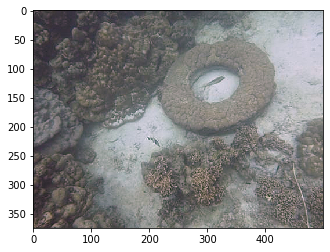

In [19]:
# print(whiteBalanced)
# whiteBalanced = np.array(whiteBalanced,dtype = np.uint8)
Traditional_unsharp_masking = tradUnsharpMask(whiteBalanced)#.astype(np.uint8))

In [20]:
#histogram stretch
def histogramStretch(channel):
    minval = channel.min()
    maxval = channel.max()
    
#     minval = 0.0
#     maxval = 1.0
    
    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            channel[i][j] = (channel[i][j] - minval)/(maxval - minval)# * 255
    return channel#.astype(np.uint8)

In [21]:
#normalised unsharp masking
def NormUnsharpMask(whiteBalanced):
    blur = cv2.GaussianBlur(whiteBalanced,(5,5),0)     # (I*G)
    temp = np.subtract(whiteBalanced,blur)             # (I - I*G)
    
    # histogram stretching
    
    red,green,blue = cv2.split(temp)
    red = histogramStretch(red)
    green = histogramStretch(green) 
    blue = histogramStretch(blue)
    
       
    tempLinearOperatorzied = cv2.merge((red,green,blue))              # N(I - I*G)
#     HLS = cv2.cvtColor(temp, cv2.COLOR_RGB2HLS)
#     h,s,i = cv2.split(HLS)
#     h = histogramStretch(h)
#     s = histogramStretch(s)
#     i = histogramStretch(i)
#     HSI = cv2.merge((h,s,i))
#     tempLinearOperatorzied = cv2.cvtColor(HSI, cv2.COLOR_HLS2RGB)
      
    Normalized_unsharp_masking = np.add(whiteBalanced,tempLinearOperatorzied) # I + N(I - I*G)
    Normalized_unsharp_masking =np.divide(Normalized_unsharp_masking,2)#.astype(np.uint8)       # (I + N(I - I*G))/2
    
    plt.imshow(Normalized_unsharp_masking)
    return Normalized_unsharp_masking

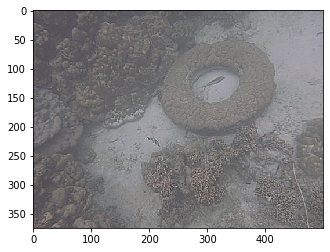

In [22]:
Normalized_unsharp_masked_image = NormUnsharpMask(whiteBalanced)#.astype(np.uint8))

## Laplacian, Saliency and Saturation weights 

In [23]:
def LaplacianContrastWeight(inputImg):
    blur = cv2.GaussianBlur(inputImg,(3,3),0)
    gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
    # Apply Laplace function
    ddepth = cv2.cv2.CV_32F
    lap = cv2.Laplacian(gray,ddepth,ksize=3)
    
    lap = np.abs(lap)
    # converting back to uint8
#     lap = cv2.convertScaleAbs(lap)
    return lap

[[1.4676261e-01 7.7334642e-02 1.1467934e-04 ... 5.9620857e-02
  1.3891101e-02 6.7863464e-03]
 [8.9225233e-02 2.3212582e-02 5.6867033e-02 ... 7.9749823e-03
  3.3915997e-02 5.7612181e-02]
 [3.0456781e-03 3.5221487e-02 4.7301292e-02 ... 2.7191401e-02
  6.1304092e-02 8.8996410e-02]
 ...
 [5.0477177e-02 5.3984314e-02 9.2162728e-02 ... 1.0672212e-03
  6.9081962e-02 1.2500781e-01]
 [1.2343764e-02 5.5293858e-02 3.7515014e-02 ... 3.9861977e-02
  6.2207282e-03 5.6832731e-02]
 [7.9376101e-02 1.4662692e-01 1.4578959e-01 ... 6.9215298e-03
  8.2180500e-03 6.4139843e-02]]


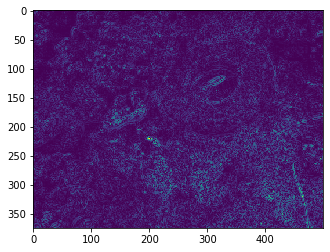

In [24]:
WL1 = LaplacianContrastWeight(gammaCorrected.astype(np.float32))
print(WL1)
plt.imshow(WL1)

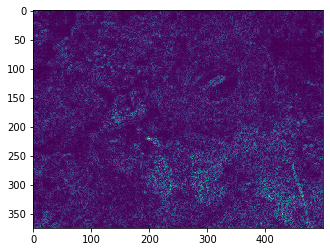

In [25]:
WL2 = LaplacianContrastWeight(Normalized_unsharp_masked_image.astype(np.float32))
plt.imshow(WL2)

In [26]:
# saliency

def saliency(inputImg):
    
    gray = cv2.cvtColor(inputImg, cv2.COLOR_RGB2GRAY)
        
    blur_filter = [1,4,6,4,1]
    blur_filter = np.matrix(blur_filter)
    blur_filter = np.divide(blur_filter,16.0)#.astype(np.uint8)
    print(blur_filter.shape)
    
    image_blurX = np.zeros((gray.shape))         
  
    image_blurX = cv2.filter2D(gray, -1, blur_filter)
#     print()
#     image_blurX = np.divide(image_blurX,16.0).astype(np.uint8)
    
    blur_filter = np.transpose(blur_filter)
    print(blur_filter.shape)
    
    image_blurY = cv2.filter2D(image_blurX, -1, blur_filter)
#     image_blurY = np.divide(image_blurY,16.0)#.astype(np.uint8)
    
    
    print(np.array_equal(image_blurX,image_blurY))
    
    
    inputImg = cv2.cvtColor(inputImg, cv2.COLOR_RGB2LAB)
    image_blurY = cv2.cvtColor(image_blurY, cv2.COLOR_GRAY2RGB)
    image_blurY = cv2.cvtColor(image_blurY, cv2.COLOR_RGB2LAB)
    
    Saliency = np.zeros((inputImg.shape))
    for i in range(inputImg.shape[0]):
        for j in range(inputImg.shape[1]):
            Saliency[i][j][0] = math.sqrt((inputImg[i][j][0] - image_blurY[i][j][0])**2)
            Saliency[i][j][1] = math.sqrt((inputImg[i][j][1] - image_blurY[i][j][1])**2)
            Saliency[i][j][2] = math.sqrt((inputImg[i][j][2] - image_blurY[i][j][2])**2)    
    Saliency = cv2.cvtColor(Saliency.astype(np.float32), cv2.COLOR_LAB2RGB)
    Saliency = cv2.cvtColor(Saliency, cv2.COLOR_RGB2GRAY)
#     Saliency = np.subtract(inputImg,image_blurY)

    Saliency = np.abs(Saliency)
    
#     Saliency = np.around(Saliency)
    
#     print(Saliency)
    
    return Saliency#.astype(np.uint8)

(1, 5)
(5, 1)
False
(375, 500)


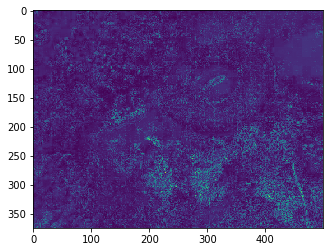

In [27]:
# i = cv2.imread('../basic/2.jpg')
# i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
# a,b,c = cv2.split(i)
# a = np.divide(a,255)
# b = np.divide(b,255)
# c = np.divide(c,255)
# i = cv2.merge((a,b,c))



# WS1 = saliency(i.astype(np.float32))
# print(WS1.shape)
# plt.imshow(WS1)
# plt.savefig('usingEq7.png',format = "png", dpi = 300)

WS1 = saliency(gammaCorrected.astype(np.float32))
print(WS1.shape)
plt.imshow(WS1)

(1, 5)
(5, 1)
False


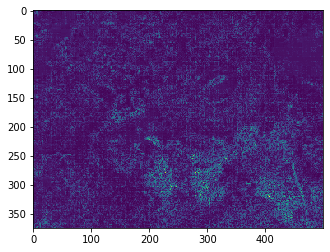

In [28]:
WS2 = saliency(Normalized_unsharp_masked_image.astype(np.float32))
plt.imshow(WS2)

In [29]:
def saturation(inputImg):
    R,G,B = cv2.split(inputImg)
    L = cv2.cvtColor(inputImg, cv2.COLOR_RGB2GRAY)
    Wsat = np.zeros((L.shape))
    for i in range(inputImg.shape[0]):
        for j in range(inputImg.shape[1]):
            Wsat[i][j] = math.sqrt(((R[i][j]-L[i][j])**2 + (G[i][j]-L[i][j])**2 + (B[i][j]-L[i][j])**2 )/3)#
    Wsat = np.abs(Wsat)
    return Wsat#.astype(np.uint8)

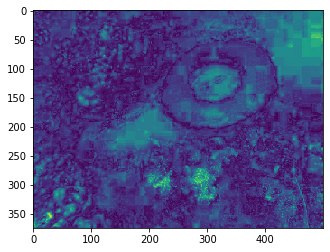

In [30]:
Wsat1 = saturation(gammaCorrected.astype(np.float32))
plt.imshow(Wsat1)

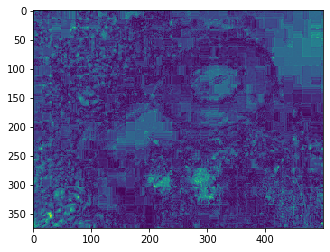

In [31]:
Wsat2 = saturation(Normalized_unsharp_masked_image.astype(np.float32))
plt.imshow(Wsat2)

In [32]:
Wk1 = np.add(WL1,WS1,Wsat1)
Wk2 = np.add(WL2,WS2,Wsat2)

Wk1t = np.add(Wk1,0.1)
Wk2t = np.add(Wk2,0.2)

Wkall = np.add(Wk1t,Wk2t)

In [33]:
Wk1_ =  np.divide(np.add(Wk1,0.1),Wkall)
Wk2_ =  np.divide(np.add(Wk2,0.1),Wkall)

[[0.34887268 0.3537853  0.3275018  ... 0.3696187  0.3408965  0.34784829]
 [0.35015362 0.3638159  0.32574514 ... 0.36884013 0.38706323 0.39992423]
 [0.31743748 0.31988881 0.33624969 ... 0.36297945 0.392169   0.40205751]
 ...
 [0.36824997 0.36724519 0.36261563 ... 0.32473037 0.36810286 0.36412098]
 [0.34152483 0.37248585 0.34328685 ... 0.32650185 0.2956212  0.38090615]
 [0.40830131 0.36812963 0.34556318 ... 0.33641472 0.33952512 0.35902532]]
0.2199756629483926
0.5511023189906086


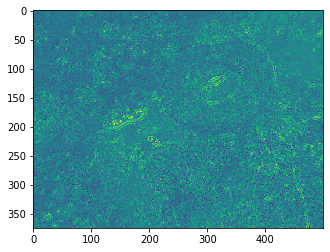

In [34]:
print(Wk1_)
print(Wk1_.min())
print(Wk1_.max())
plt.imshow(Wk1_)

0.2446750204278232
0.6152759097588973


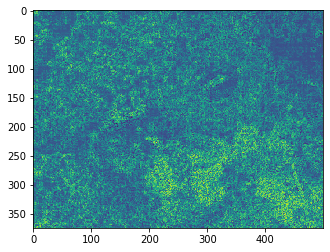

In [35]:
print(Wk2_.min())
print(Wk2_.max())
plt.imshow(Wk2_)

## Fusion

In [36]:
# Naive fusion
def naiveFusion(Wk1_,Wk2_,gammaCorrected,Normalized_unsharp_masked_image):
    
    nv1 = np.zeros((gammaCorrected.shape))
    for i in range(gammaCorrected.shape[0]):
        for j in range(gammaCorrected.shape[1]):
            nv1[i][j][0] = gammaCorrected[i][j][0] * Wk1_[i][j]
            nv1[i][j][1] = gammaCorrected[i][j][1] * Wk1_[i][j] 
            nv1[i][j][2] = gammaCorrected[i][j][2] * Wk1_[i][j]
     
    nv2 = np.zeros((Normalized_unsharp_masked_image.shape))
    for i in range(Normalized_unsharp_masked_image.shape[0]):
        for j in range(Normalized_unsharp_masked_image.shape[1]):
            nv2[i][j][0] = Normalized_unsharp_masked_image[i][j][0] * Wk2_[i][j]
            nv2[i][j][1] = Normalized_unsharp_masked_image[i][j][1] * Wk2_[i][j] 
            nv2[i][j][2] = Normalized_unsharp_masked_image[i][j][2] * Wk2_[i][j]                
    
#     nv1 = np.multiply(Wk1_,gammaCorrected)
#     nv2 = np.multiply(Wk2_,Normalized_unsharp_masked_image)

#     nv = np.add(nv1.astype(np.uint8),nv2.astype(np.uint8))
    nv = np.add(nv1,nv2)
    plt.imshow(nv)
    plt.savefig('NaiveFusion.png',format = "png", dpi = 150)

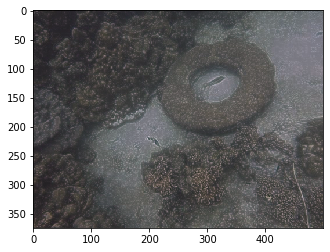

In [37]:
naiveFusion(Wk1_,Wk2_,gammaCorrected,Normalized_unsharp_masked_image)